# Medical Insurance Analysis

The objective of the project is to use Python to analyze different attributes included in insurance.csv in order to better understand the patient data contained therein and to obtain insight into potential implementations for the dataset.

In [2]:
#importing the required library
import pandas as pd
import csv

In [3]:
#importing the dataset
df_dataset = pd.read_csv('insurance.csv')

In [5]:
df_dataset

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


### The next step is to look through insurance.csv in order to get aquanted with the data.
Then we check the  following aspects of the data file in order to know:

- The names of columns and rows
- Any noticeable missing data
- Types of values (numerical vs. categorical)

In [8]:
#Create empty lists for the various attributes in insurance.csv
ages = []
sexes = []
bmis = []
num_children = []
smoker_statuses = []
regions = []
insurance_charges = []

### The insurance.csv dataset contains the following columns:

- Patient Age
- Patient Sex
- Patient BMI
- Patient Number of Children
- Patient Smoking Status
- Patient Geopraphical Region
- Patient Yearly Medical Insurance Cost

In [15]:
users_list = []
with open('insurance.csv', newline = '') as users_csv:
    user_reader = csv.DictReader(users_csv)
    for user in user_reader:
        user['age'] = int(user['age']) 
        user['bmi'] = float(user['bmi'])
        user['children'] = int(user['children'])
        user['charges'] = float(user['charges'])
        user['smoker'] = user['smoker'] == 'yes'
        users_list.append(user)

### Gender and age distribution on a graph

In [16]:
# Create generalized age groups:
age_groups = {
    '18-25': {
        'male': 0,
        'female': 0,
        'total': 0
    },
    '26-30': {
        'male': 0,
        'female': 0,
        'total': 0
    },    
    '31-45': {
        'male': 0,
        'female': 0,
        'total': 0
    }, 
    '46-60': {
        'male': 0,
        'female': 0,
        'total': 0
    }, 
    '61-75': {
        'male': 0,
        'female': 0,
        'total': 0
    }, 
    '76 +': {
        'male': 0,
        'female': 0,
        'total': 0
    } 
}

In [17]:
# Put representatives' data points in each age groups and determine gender proportion in each.
        
for user in users_list:
    age = user['age']
    sex = user['sex']
    if age >= 18 and age <= 25:
        age_groups['18-25']['total'] += 1
        age_groups['18-25'][sex] += 1
    elif age >= 26 and age <= 30:
        age_groups['26-30']['total'] += 1
        age_groups['26-30'][sex] += 1
    elif age >= 31 and age <= 45:
        age_groups['31-45']['total'] += 1
        age_groups['31-45'][sex] += 1
    elif age >= 46 and age <= 60:
        age_groups['46-60']['total'] += 1
        age_groups['46-60'][sex] += 1
    elif age >= 61 and age <= 75:
        age_groups['61-75']['total'] += 1
        age_groups['61-75'][sex] += 1
    elif age >= 76:
        age_groups['76 +']['total'] += 1
        age_groups['76 +'][sex] += 1
age_groups

{'18-25': {'male': 159, 'female': 147, 'total': 306},
 '26-30': {'male': 71, 'female': 67, 'total': 138},
 '31-45': {'male': 199, 'female': 195, 'total': 394},
 '46-60': {'male': 203, 'female': 206, 'total': 409},
 '61-75': {'male': 44, 'female': 47, 'total': 91},
 '76 +': {'male': 0, 'female': 0, 'total': 0}}

In [18]:
# Converting the distribution into percentage
def percentage_calc(part, whole):
    if whole == 0:
        return 0
    percentage = round(100 * part/whole, 2)
    return percentage

def age_groups_in_percentages(list):
    age_groups_in_perc = {
        '18-25': {
            'male': 0,
            'female': 0,
            'diff': 0
        },
        '26-30': {
            'male': 0,
            'female': 0,
            'diff': 0
        },    
        '31-45': {
            'male': 0,
            'female': 0,
            'diff': 0
        }, 
        '46-60': {
            'male': 0,
            'female': 0,
            'diff': 0    
        }, 
        '61-75': {
            'male': 0,
            'female': 0,
            'diff': 0
        }, 
        '76 +': {
            'male': 0,
            'female': 0,
            'diff': 0
        } 
    }
    for key, value in age_groups.items():
        age_groups_in_perc[key]['male'] = percentage_calc(value['male'], value['total'])
        age_groups_in_perc[key]['female'] = percentage_calc(value['female'], value['total'])
        age_groups_in_perc[key]['diff'] = round(abs(age_groups_in_perc[key]['male'] - age_groups_in_perc[key]['female']), 2)
    return age_groups_in_perc




age_groups_in_percentages(age_groups)

{'18-25': {'male': 51.96, 'female': 48.04, 'diff': 3.92},
 '26-30': {'male': 51.45, 'female': 48.55, 'diff': 2.9},
 '31-45': {'male': 50.51, 'female': 49.49, 'diff': 1.02},
 '46-60': {'male': 49.63, 'female': 50.37, 'diff': 0.74},
 '61-75': {'male': 48.35, 'female': 51.65, 'diff': 3.3},
 '76 +': {'male': 0, 'female': 0, 'diff': 0}}

In [20]:
# General gender proportion in numbers and percentage (%)
total_n_males = 0
total_n_females = 0
for value in age_groups.values():
    total_n_males += value['male']
for value in age_groups.values():
    total_n_females += value['female']

total_n_users = total_n_females + total_n_males

print(percentage_calc(total_n_males, total_n_users))
print(percentage_calc(total_n_females, total_n_users))

50.52
49.48


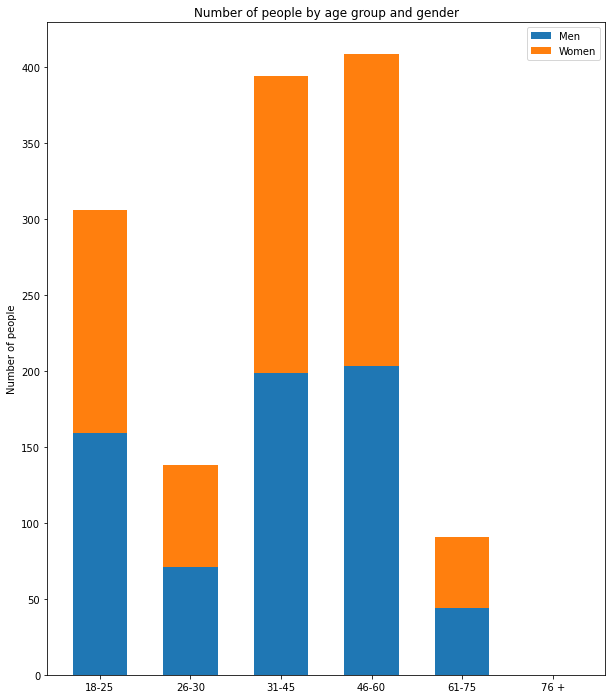

In [27]:
# Shows the data in graph
import matplotlib.pyplot as plt 

labels = age_groups.keys()
men_ages = [value['male'] for value in age_groups.values()]
women_ages = [value['female'] for value in age_groups.values()]
width = 0.60     

fig, ax = plt.subplots(figsize=(10, 12))


ax.bar(labels, men_ages, width, label='Men')
ax.bar(labels, women_ages, width, bottom=men_ages,
       label='Women')

ax.set_ylabel('Number of people')
ax.set_title('Number of people by age group and gender')
ax.legend()

plt.show()


#### Nasabah yang berpotensi melakukan klaim adalah nasabah perempuan yang merokok, berapa banyak nasabah dengan ciri-ciri tersebut?

In [6]:
df_dataset[ (df_dataset['sex'] == 'female') & (df_dataset['smoker'] == 'yes') ]

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
11,62,female,26.290,0,yes,southeast,27808.72510
23,34,female,31.920,1,yes,northeast,37701.87680
58,53,female,22.880,1,yes,southeast,23244.79020
64,20,female,22.420,0,yes,northwest,14711.74380
...,...,...,...,...,...,...,...
1308,25,female,30.200,0,yes,southwest,33900.65300
1313,19,female,34.700,2,yes,southwest,36397.57600
1314,30,female,23.655,3,yes,northwest,18765.87545
1323,42,female,40.370,2,yes,southeast,43896.37630


In [7]:
#Variable data adalah hasil jumlah female smoker
data = df_dataset[ (df_dataset['sex'] == 'female') & (df_dataset['smoker'] == 'yes') ]

In [8]:
data.shape

(115, 7)

#### Berdasarkan ciri-ciri nasabah di pertanyaan sebelumnya, berapa rata-rata biaya yang harus disiapkan perusahaan asuransi untuk membayarkan klaim nasabah-nasabah tersebut?

In [9]:
data['charges'].mean()

30678.996276260867

#### Anggi dari perusahaan asuransi ingin mengunjungi nasabah yang berusia 64 tahun dan memiliki 1 orang anak. Bantulah Anggi untuk menemukan dimana wilayah tempat tinggal nasabah tersebut?

In [10]:
df_dataset[ (df_dataset['age'] == 64) & (df_dataset['children'] == 1) ]

,age,sex,bmi,children,smoker,region,charges
62,64,male,24.70,1,no,northwest,30166.61817
328,64,female,33.80,1,yes,southwest,47928.03000
418,64,male,39.16,1,no,southeast,14418.28040


#### Berapa rata-rata body mass index (bmi) untuk nasabah yang berada di wilayah yang mengandung kata "north"?

In [11]:
df_dataset[df_dataset['region'].str.contains("north", case=True)]

,age,sex,bmi,children,smoker,region,charges
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692
...,...,...,...,...,...,...,...
1326,42,female,32.870,0,no,northeast,7050.02130
1328,23,female,24.225,2,no,northeast,22395.74424
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080


In [12]:
data_bmi = df_dataset[df_dataset['region'].str.contains("north", case=True)]

In [13]:
data_bmi['bmi'].mean()

29.186664098613257

#### Bagi nasabah laki-laki perokok dengan usia lebih dari 50 tahun, jika dibuat kolom baru dengan nilai bmi - 1.5, maka berapa rata-rata bmi_baru tersebut?

In [32]:
data_New = df_dataset[ (df_dataset['smoker']=='yes') & (df_dataset['sex']=='male') & (df_dataset['age']>50)]

In [33]:
data_New['Bmi_new'] = data_New['bmi']-1.5

In [31]:
data_New['Bmi_new'].mean()

30.6904054054054